In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

import import_ipynb
import Polynome2p1 as Poly
import Fonctions_Test as FT

importing Jupyter notebook from Polynome2p1.ipynb
importing Jupyter notebook from Fonctions_Test.ipynb


## Initialisation

In [2]:
def test_init(p):
    X = Poly.init_X(p)
    plt.plot(X[:p+1],np.ones(len(X[:p+1])),'ob')
    plt.plot(X[p+1:],np.ones(len(X[p+1:])),'or')

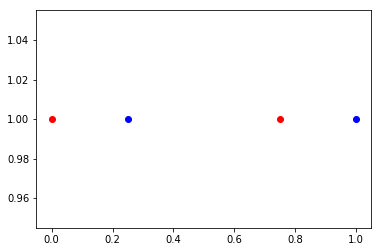

In [3]:
p = 1
test_init(p)

## Operateur S

In [4]:
def test_S(a):
    print(a)
    Speps = Poly.S(4,0.1,a)
    print(Speps)

    plt.plot(Speps[:4],np.ones(4),'or')
    plt.plot(Speps[4:],np.ones(4),'ob')

[0.1, 0.35, 0.5, 0.8, 0.07, 0.39, 0.65, 0.85]
[0.17391304 0.39130435 0.56521739 0.82608696 0.16949153 0.44067797
 0.66101695 0.83050847]


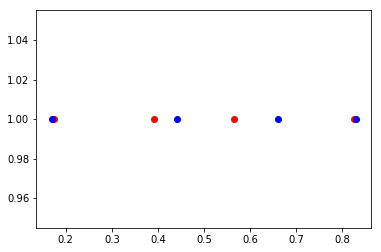

In [5]:
a = [0.1,0.35,0.5,0.8,0.07,0.39,0.65,0.85]
test_S(a)

## Erreur par les trapèzes

In [6]:
def test_erreurs_trapezes(fx,attendu,x=None):
    print("Obtenu : ", Poly.trapezes(fx,x))
    print("Attendu : ",attendu)

x = np.linspace(0,1,5)
fx = np.array([0,1,3,3,2])
attendu = 0.25*0.5 + 0.25*2 + 3*0.25 + 0.25*2.5
test_erreurs_trapezes(fx,attendu)

Obtenu :  2.0
Attendu :  2.0


# Algorithme

In [7]:
def test_approx(p,f,h,epsilon,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,1000001)
    px, param_interpol,nb_iter = Poly.approxh(x,p,f,h,epsilon,s=s,ResidusNewton=ResidusNewton)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, Poly.pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.title("Fonction "+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon))
        plt.savefig("./Images/Test/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/Test/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
        plt.show()
    
    return px,fx

### Test sur des fonctions classiques 

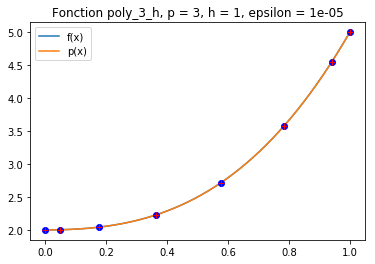

Norme de l'erreur : 
    n2 = 9.349151636590414e-13
    ninf =  7.105427357601002e-15
    trapezes =  5.504088296256808e-16 



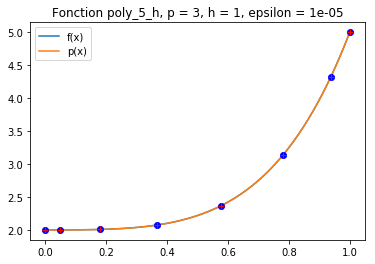

Norme de l'erreur : 
    n2 = 8.182046923641782e-13
    ninf =  6.217248937900877e-15
    trapezes =  4.539384423909138e-16 



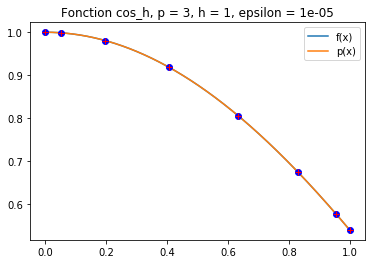

Norme de l'erreur : 
    n2 = 8.153809768410576e-07
    ninf =  1.444794617277978e-09
    trapezes =  6.953298214960318e-10 



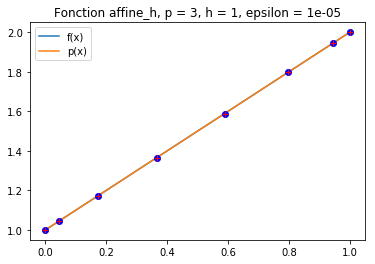

Norme de l'erreur : 
    n2 = 4.994657839252376e-13
    ninf =  2.4424906541753444e-15
    trapezes =  3.0063462830318467e-16 



In [8]:
h = 1
p = 3
epsilon=1e-5
fonctions_test = FT.fonctions("Sans Arg","Classic")

for fonctions in fonctions_test : 
    px,fx = test_approx(p,fonctions,h,epsilon,affichage=1,s=1)
    print("Norme de l'erreur : ")
    print("    n2 =", npl.norm(px-fx))
    print("    ninf = ", npl.norm(px-fx,np.inf))
    print("    trapezes = ", Poly.trapezes(px-fx),"\n")

### Erreur algo Newton

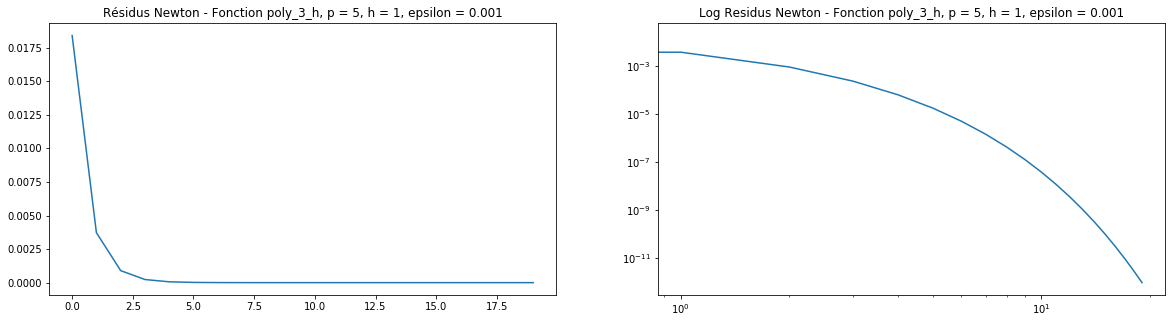

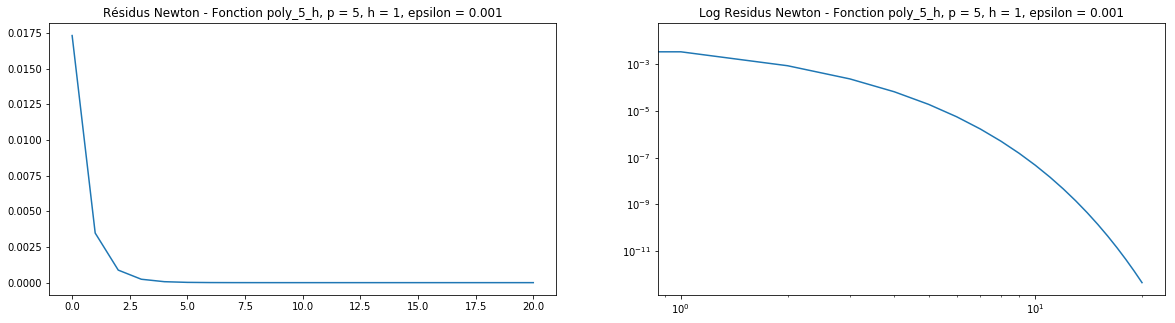

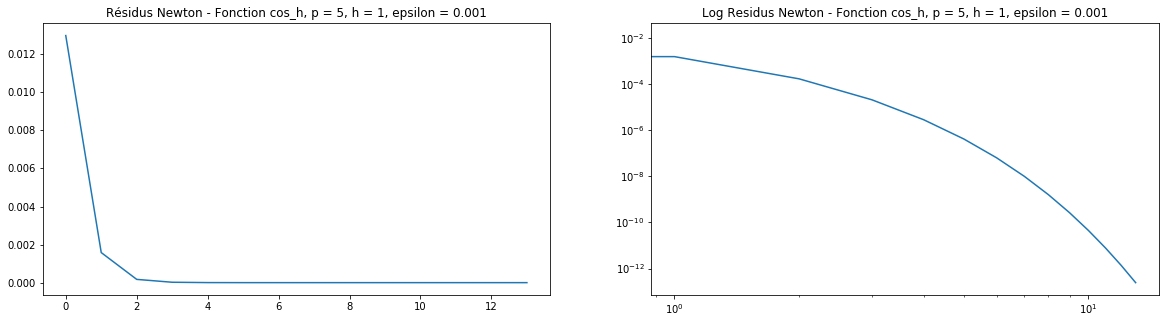

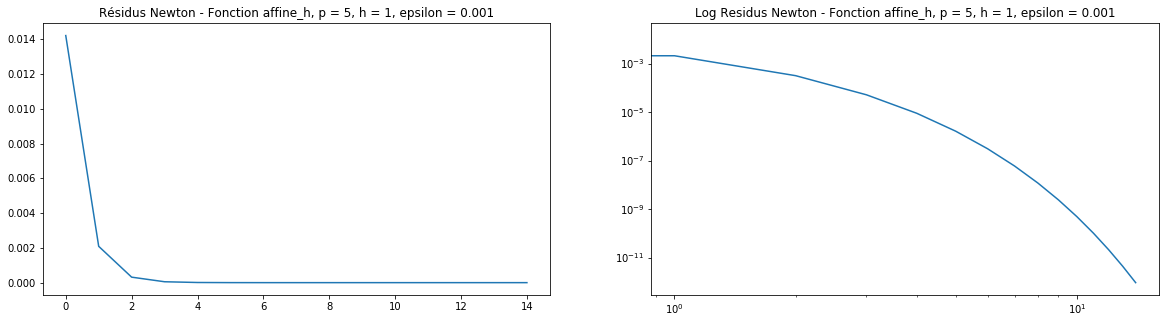

In [9]:
h = 1
epsilon=0.001
p = 5

for fonctions in fonctions_test : 
    px,fx = test_approx(p,fonctions,h,epsilon,0,0,1)

## Test avec une fonction + cte ou + droite

In [10]:
def test_approx_offset(p,f,h,epsilon,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,1000001)
    px, param_interpol,nb_iter = Poly.approxh(x,p,f,h,epsilon,s=s,ResidusNewton=ResidusNewton)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, Poly.pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.title("Fonction "+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon))
        plt.savefig("./Images/Test/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/Test/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
        plt.show()
    
    return px,fx,interp

In [11]:
def sin(x,h):
    x = x*h
    return np.sin(x+0.5)

def cst(x,h):
    c = 1
    if isinstance(x,np.ndarray)  :
        return c*np.ones(len(x))
    else :
        return c

def s_c(x,h):
    return sin(x,h) + cst(x,h)

def aff(x,h):
    x = x*h +1
    return 2*x

def pn4(x,h):
    x= x*h
    return x**4 + 1

def s_a(x,h):
    return sin(x,h) + aff(x,h) 

def s_4(x,h):
    return sin(x,h) + pn4(x,h) 

fonctions = [sin,cst,aff,pn4,s_c,s_a,s_4]

In [14]:
h = 1
p = 1
epsilon = 1e-9

Err_avec_S = np.zeros((len(fonctions),3))
Err_sans_S = np.zeros((len(fonctions),3))
Interp_points_S = []
Interp_points = []
for f in range(len(fonctions)) : 
    px,fx,interp = test_approx_offset(p,fonctions[f],h,epsilon,0,1)
    Interp_points_S += [interp] 
    Err_avec_S[f,0] = npl.norm(px-fx)
    Err_avec_S[f,1] = npl.norm(px-fx,np.inf)
    Err_avec_S[f,2] = Poly.trapezes(px-fx)
    px,fx,interp1 = test_approx_offset(p,fonctions[f],h,epsilon,0,0)
    Interp_points += [interp1] 
    Err_sans_S[f,0] = npl.norm(px-fx)
    Err_sans_S[f,1] = npl.norm(px-fx,np.inf)
    Err_sans_S[f,2] = Poly.trapezes(px-fx)
    
    
print('Erreurs avec calcul avec S')
print("Fonction     Norme 2        Nome inf        Trapezes ")
for i in range (len(fonctions)):
    name = str(fonctions[i]).split(' ')[1]
    print( '%s %16g  %14g  %14g' % (name, Err_avec_S[i,0], Err_avec_S[i,1], Err_avec_S[i,2]  ))
print("\n")    

#importance de wla séparation des noeuds ? 
print('Erreurs avec calcul sans S')
print("Fonction     Norme 2        Nome inf        Trapezes ")
for i in range (len(fonctions)):
    name = str(fonctions[i]).split(' ')[1]
    print( '%s %16g  %14g  %14g' % (name, Err_avec_S[i,0], Err_avec_S[i,1], Err_avec_S[i,2]  ))   
print("\n") 
    
#Etude de la derivabilité des points 
print("Fonction   Alpha_0_S        Alpha_0      Beta_p_S         Beta_p")
for i in range (len(fonctions)):
    name = str(fonctions[i]).split(' ')[1]
    print('%s %16g %14g %14g %14g' % (name,Interp_points_S[i][0],Interp_points[i][0],Interp_points_S[i][3], Interp_points[i][3])) 

Erreurs avec calcul avec S
Fonction     Norme 2        Nome inf        Trapezes 
sin         0.333995     0.000565499     0.000286235
cst      1.12618e-13     4.44089e-16     4.24024e-17
aff      6.27714e-13     2.66454e-15      3.7007e-16
pn4          8.48582       0.0130997      0.00748186
s_c         0.318681     0.000553444     0.000275257
s_a         0.323056     0.000537764     0.000278724
s_4          9.17925       0.0148455      0.00802649


Erreurs avec calcul sans S
Fonction     Norme 2        Nome inf        Trapezes 
sin         0.333995     0.000565499     0.000286235
cst      1.12618e-13     4.44089e-16     4.24024e-17
aff      6.27714e-13     2.66454e-15      3.7007e-16
pn4          8.48582       0.0130997      0.00748186
s_c         0.318681     0.000553444     0.000275257
s_a         0.323056     0.000537764     0.000278724
s_4          9.17925       0.0148455      0.00802649


Fonction   Alpha_0_S        Alpha_0      Beta_p_S         Beta_p
sin         0.197557       

# Test pour fonctions avec arguments

In [15]:
import Polynome2p1_avecArgumentsF as Poly_Arg

importing Jupyter notebook from Polynome2p1_avecArgumentsF.ipynb


In [16]:
def test_approx(p,f,h,argf,epsilon,affichage=None,s=None):
    x = np.linspace(0,1,1000001)
    px, param_interpol,nb_iter = Poly_Arg.approxh(x,p,f,h,argf,epsilon,s=s)


    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,argf,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,argf,interp[p+1:],interp,epsilon)
    
    fx = f(x,h,*argf) 
    
    if affichage != None or affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h,*argf),'ob')
        plt.plot(interp, Poly_Arg.pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.title("Fonction "+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+", l = "+str(*argf))
        plt.savefig("./Images/Test/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+", l ="+str(*argf)+".eps", format='eps')
        plt.savefig("./Images/Test/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+", l ="+str(*argf)+".png", format='png')
        plt.show()
    
    return px,fx

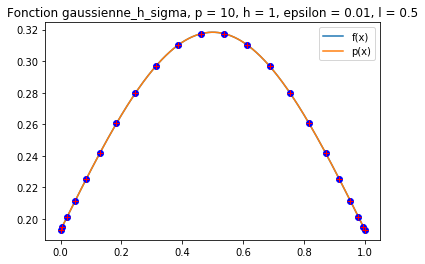

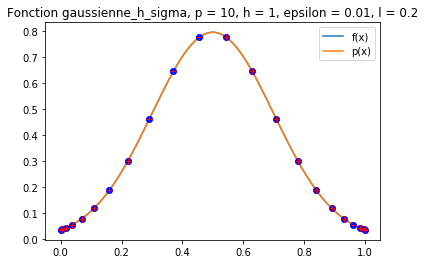

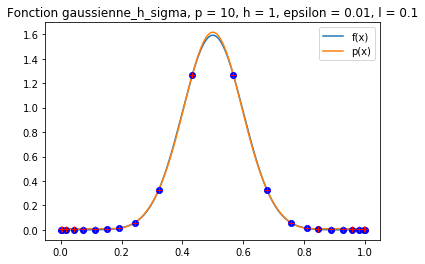

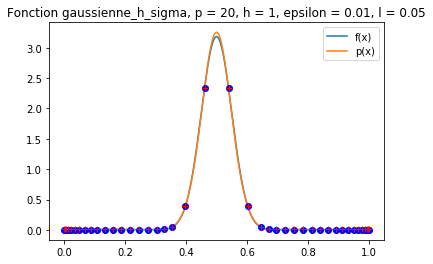

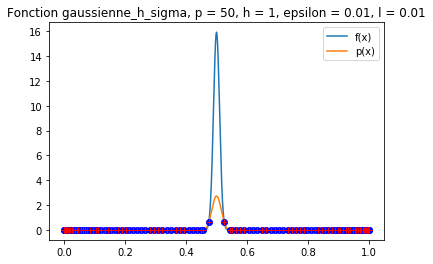

In [17]:
h = 1
p = [10,10,10,20,50]
epsilon=0.01
l = [[1/2],[1/5],[1/10],[1/20],[1/100]]
fonctions = FT.fonctions("Avec Arg")
Err = np.zeros((2,len(l)))

for i in range(len(l)):
    px,fx = test_approx(p[i],fonctions[0],h,l[i],epsilon,1)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    
#plt.plot(Err[0,:],label="Norme 2")
#plt.plot(Err[1,:],label="Norme inf")
#plt.legend()

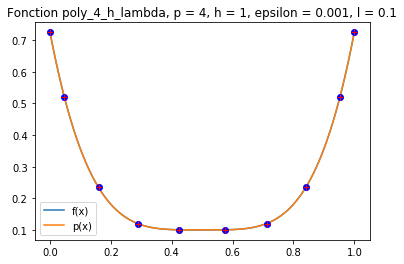

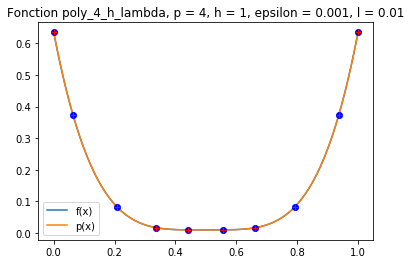

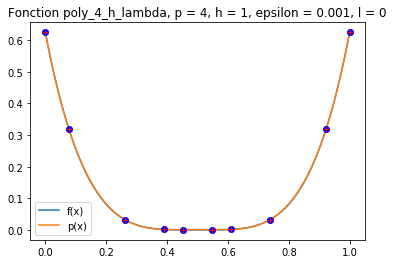

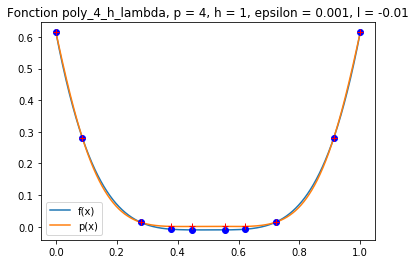

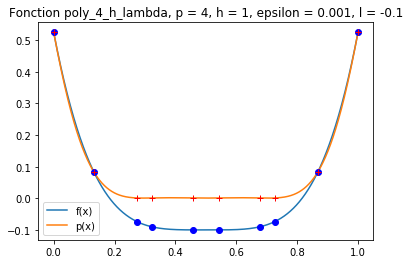

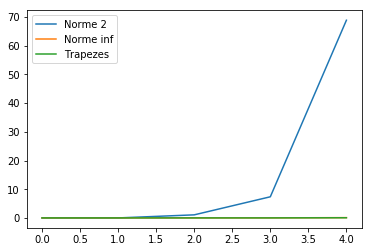

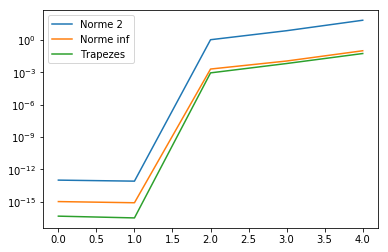

In [22]:
h = 1
p = 4
epsilon=1e-3
l = [[0.1],[0.01],[0],[-0.01],[-0.1]]
fonctions = FT.fonctions("Avec Arg")
Err = np.zeros((3,len(l)))

for i in range(len(l)):
    px,fx = test_approx(p,fonctions[1],h,l[i],epsilon,1,1)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    Err[2,i] = Poly_Arg.trapezes(px-fx)
    
plt.plot(Err[0,:],label="Norme 2")
plt.plot(Err[1,:],label="Norme inf")
plt.plot(Err[2,:],label="Trapezes")
plt.legend()
plt.show()
plt.semilogy(Err[0,:],label="Norme 2")
plt.semilogy(Err[1,:],label="Norme inf")
plt.semilogy(Err[2,:],label="Trapezes")
plt.legend()


Remarque : par rapport au papier diff pour le n=9, lambda = -0.1